In [1]:
# import glob # For getting file names
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import pandas as pd
# import pickle
# # import seaborn as sns
# # import torch

# from collections import Counter
# # from gap_statistic import OptimalK
# from scipy import stats, cluster
# from sklearn.cluster import KMeans
# # from yellowbrick.cluster import KElbowVisualizer

# from utils.clustering_utils import *
# from utils.conformal_utils import *
from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

In [15]:
def initialize_dict(metrics, methods, suffixes=['mean', 'se']):
    d = {}
    for suffix in suffixes: 
        for metric in metrics:
            d[f'{metric}_{suffix}'] = {}

            for method in methods:

                d[f'{metric}_{suffix}'][method] = []
            
            
    return d

def make_varying_n_plot(dataset, score_function, 
                        n_list = [10, 20, 30, 40, 50, 75, 100], 
                        save_folder='.cache/paper/varying_n',
                        metric_list = ['class_cov_gap', 'avg_set_size'],
                        cal_sampling = 'random',
                        metric_to_name = {'class_cov_gap': 'Class coverage gap', 'avg_set_size': 'Average set size', 'very_undercovered': 'Fraction very undercovered'},
                        method_list = ['standard', 'classwise', 'classwise_default_standard', 'cluster_balanced'],
                        dataset_to_name = {'imagenet': 'ImageNet', 'cifar-100': 'CIFAR-100', 
                       'places365': 'Places365', 'inaturalist': 'iNaturalist'}): 

    # 1) Compute aggregated_results dict
    aggregated_results = initialize_dict(metric_list, method_list)

    for n_totalcal in n_list:

        curr_folder = f'{save_folder}/{dataset}/{cal_sampling}_calset/n_totalcal={n_totalcal}/score={score_function}'

#         print(curr_folder)
        methods = ['standard', 'classwise', 'classwise_default_standard', 'always_cluster']
        df = average_results_across_seeds(curr_folder, print_results=False, display_table=False, methods=method_list)

#         display(df)
        for metric in metric_list:

            for method in method_list:

                for suffix in ['mean', 'se']: # Extract mean and SE

                    aggregated_results[f'{metric}_{suffix}'][method].append(df[f'{metric}_{suffix}'][df['method']==method].values[0])
    
    # 2) Make plot 
    sns.set_style(style='white', rc={'axes.spines.right': False, 'axes.spines.top': False})
    sns.set_palette('pastel')
    sns.set_context('paper') # 'paper', 'talk', 'poster'

    for metric in metric_list:

            for method in method_list:
                x = n_list
                y = np.array(aggregated_results[f'{metric}_mean'][method])
                se = np.array(aggregated_results[f'{metric}_se'][method])
                plt.plot(x, y, '-o', label=method, alpha=0.8)
                # Add 95% error bars
                plt.fill_between(x, y-1.96*se, y+1.96*se, alpha=0.1)

            plt.xlabel('Average number of examples per class')
            plt.ylabel(metric_to_name[metric])
            plt.title(f'{dataset_to_name[dataset]}, {score_function}')
            plt.legend()
            
            plt.xticks(n_list)
            plt.show()


In [31]:
n_list = [10, 20, 30, 40, 50, 75, 100]

save_folder = '.cache/paper/varying_n/'
cal_sampling = 'balanced' # or 'balanced'

metric_list = ['class_cov_gap', 'avg_set_size', 'very_undercovered']
method_list = ['standard', 'classwise', 'classwise_default_standard', 
               'cluster_balanced', 'cluster_proportional', 'cluster_doubledip', 
               'regularized_classwise']

Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


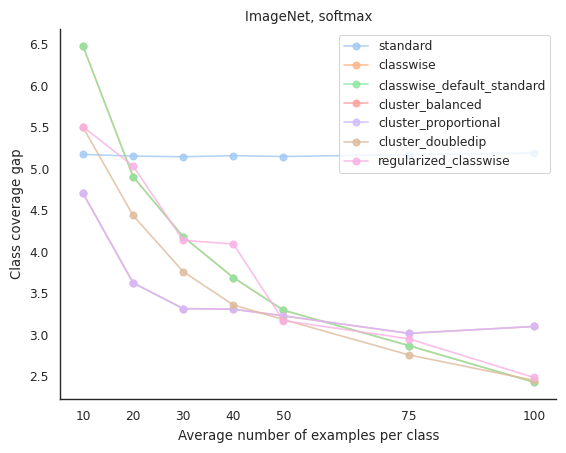

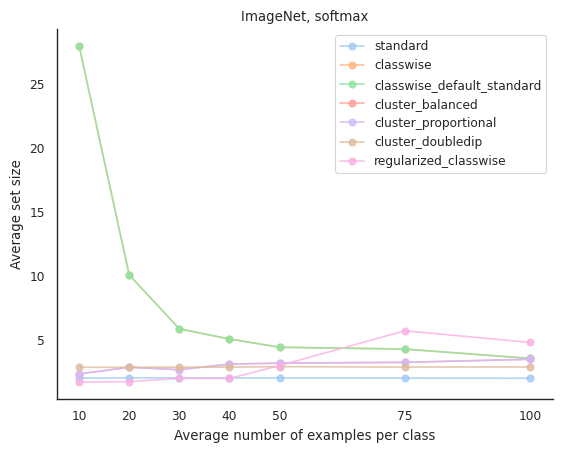

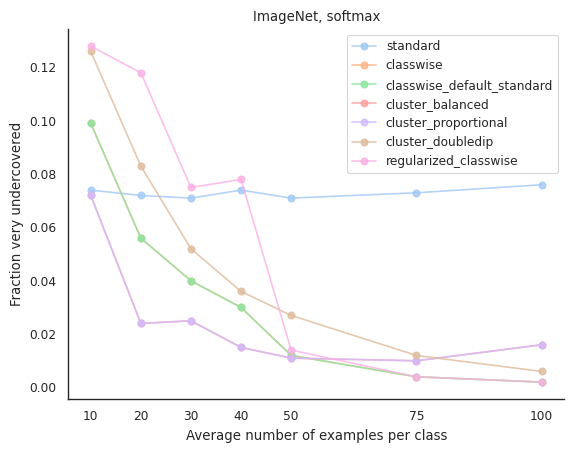

Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 0
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 0
Number of seeds found: 10


/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/si

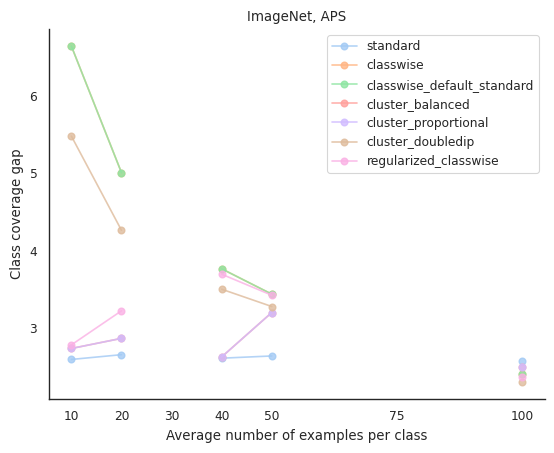

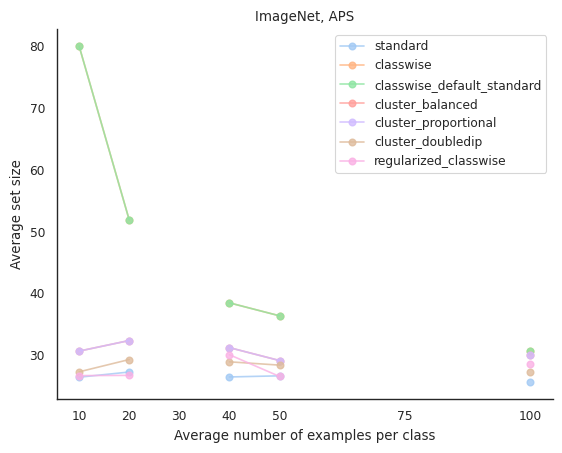

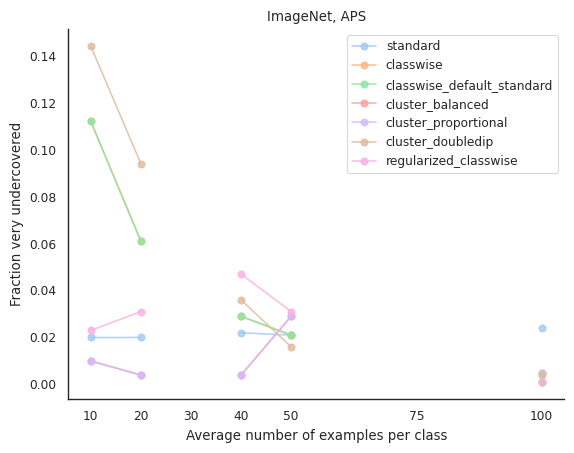

Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 0
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 0
Number of seeds found: 10


/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/si

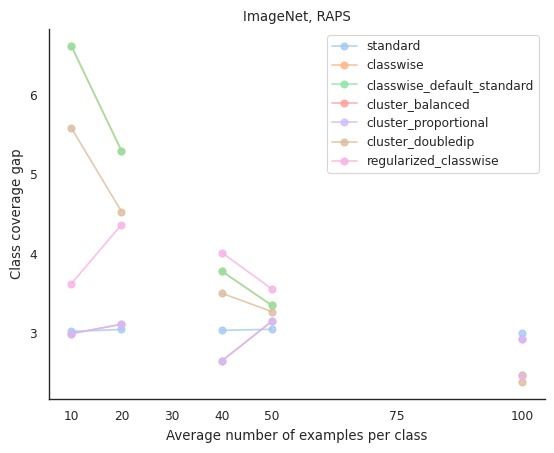

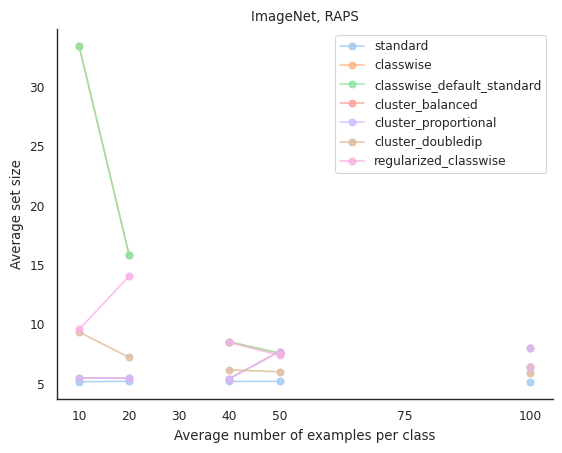

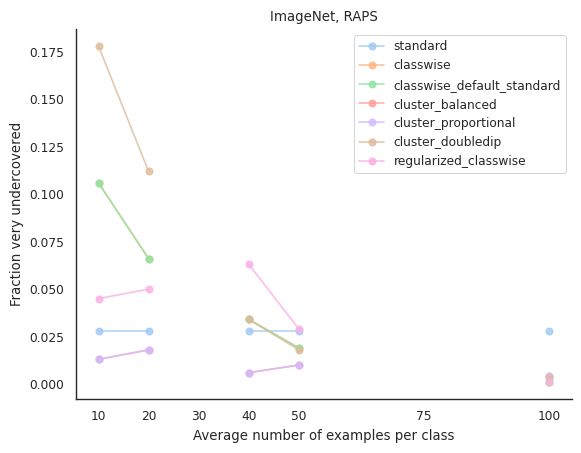

Number of seeds found: 0
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


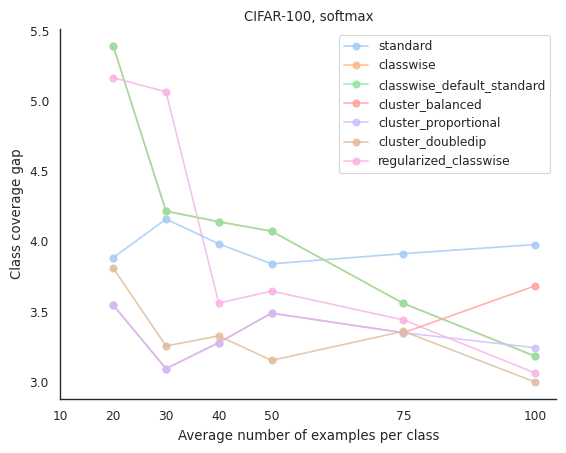

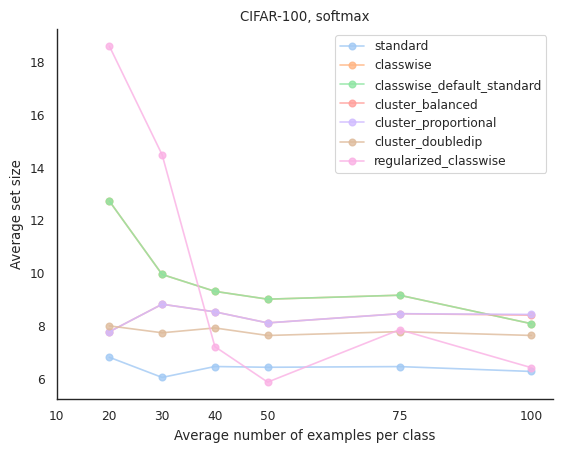

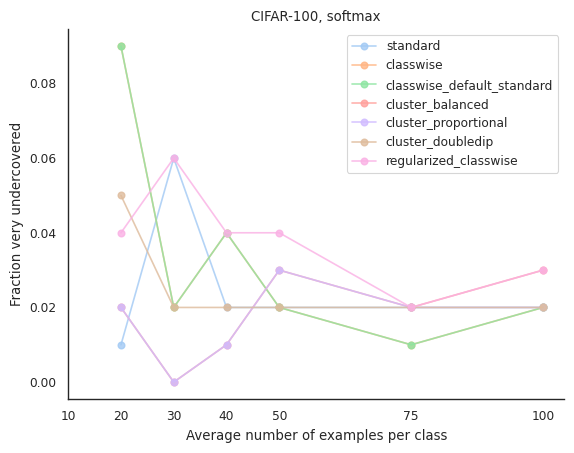

Number of seeds found: 0
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


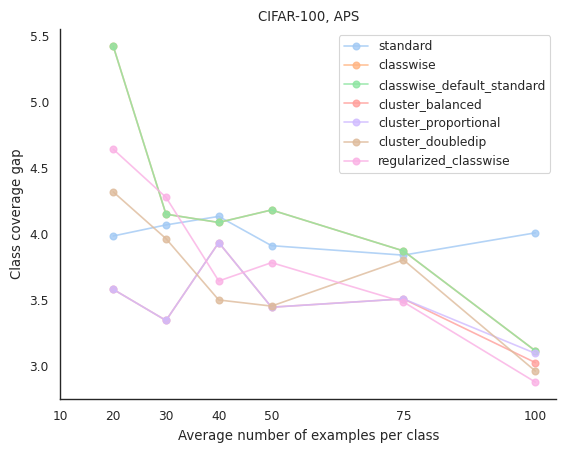

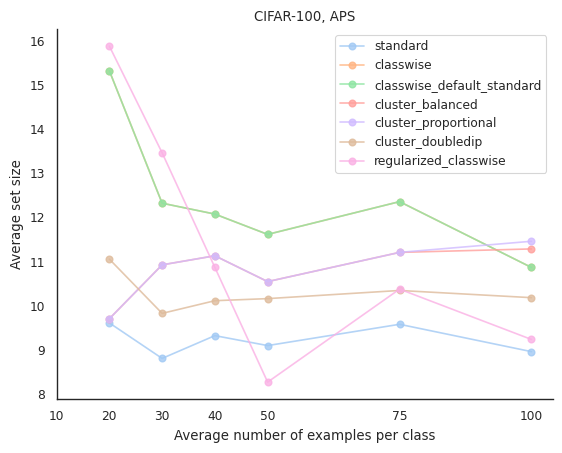

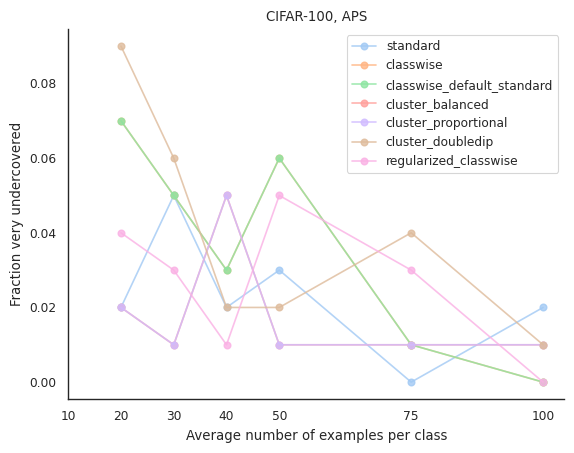

Number of seeds found: 0
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tding/miniconda3/envs/py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


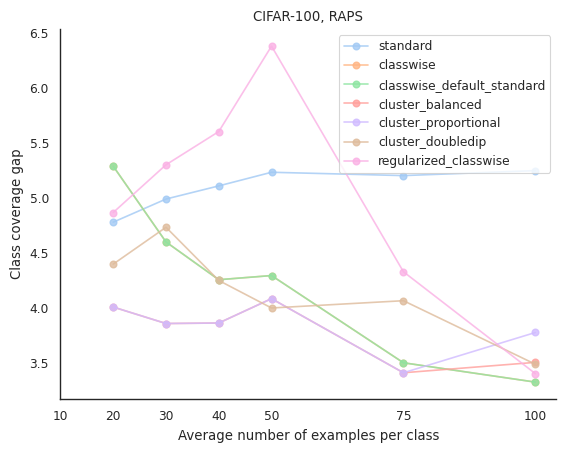

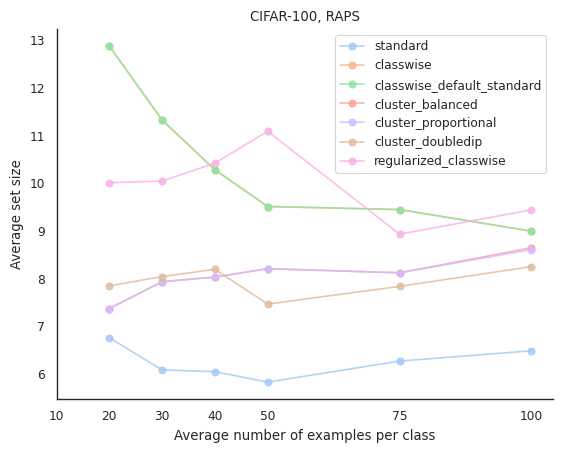

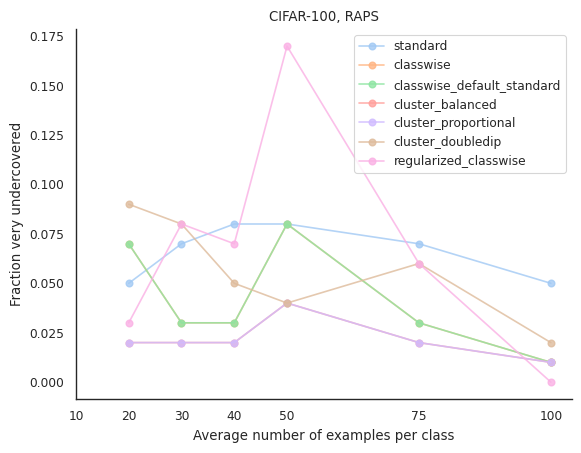

Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


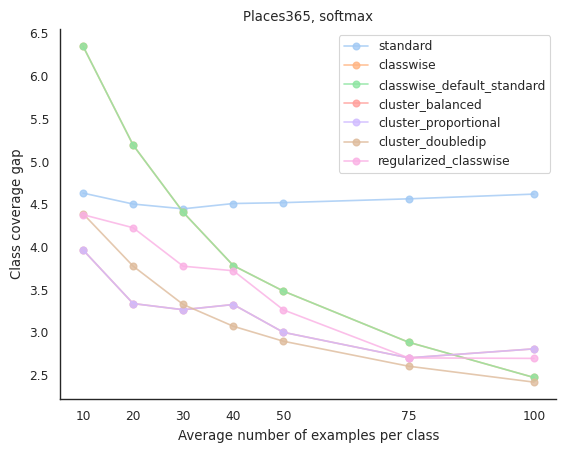

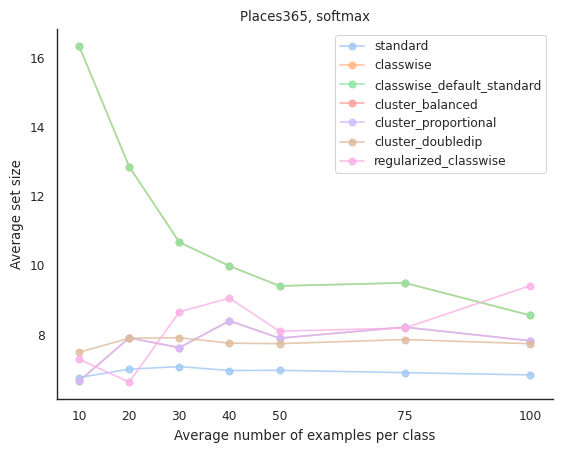

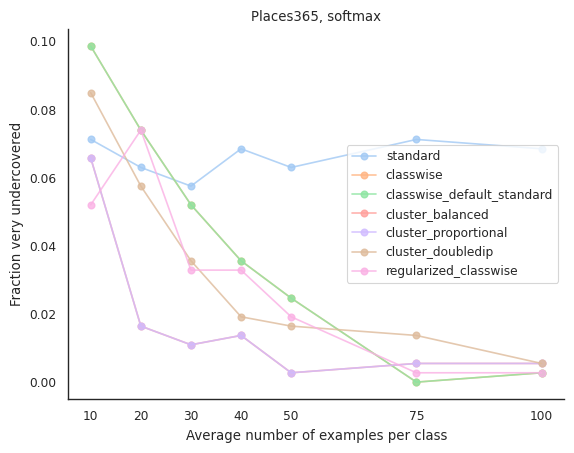

Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


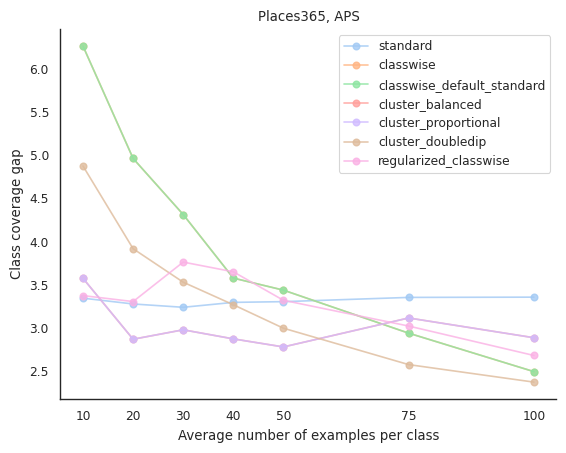

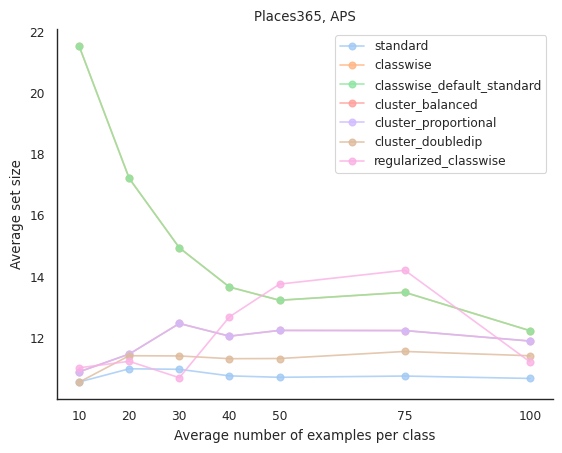

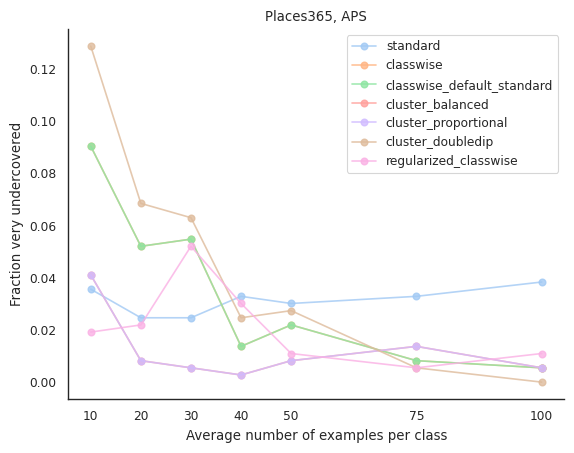

Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10
Number of seeds found: 10


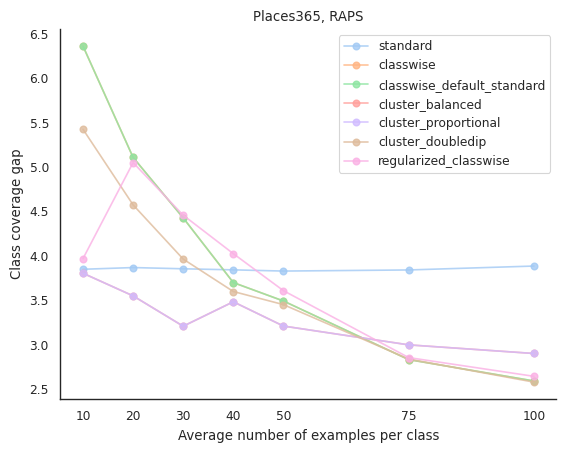

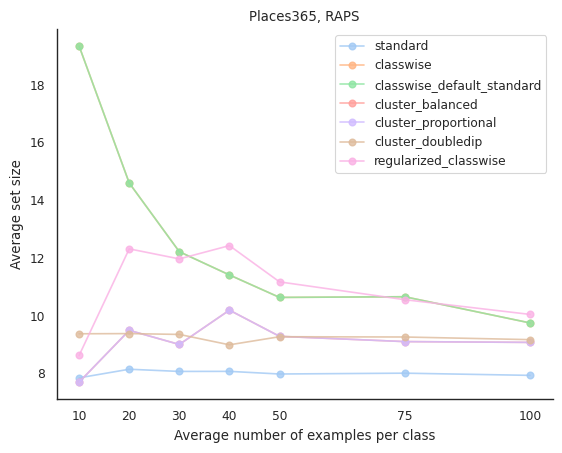

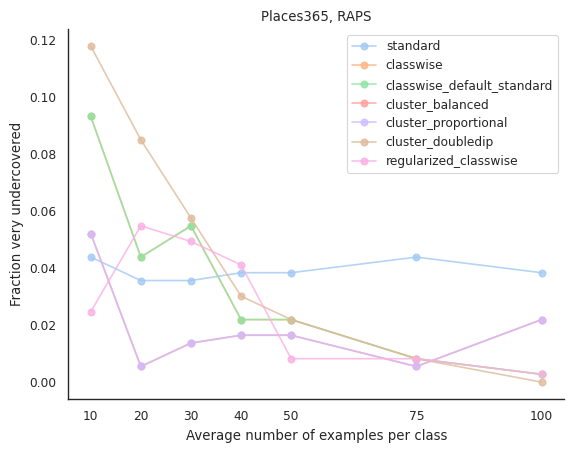

In [32]:
# dataset = 'imagenet'
# score_function = 'softmax'

# dataset_list = ['imagenet', 'cifar-100', 'places365', 'inaturalist']
dataset_list = ['imagenet', 'cifar-100', 'places365']
# score_function_list = ['softmax']
score_function_list = ['softmax', 'APS', 'RAPS']

for dataset in dataset_list:
    for score_function in score_function_list:
        make_varying_n_plot(dataset, score_function, cal_sampling=cal_sampling, metric_list=metric_list, method_list=method_list)